In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [2]:
#read data
df = pd.read_csv('C:/Users/kwame.adu/Desktop/Kwame/Learning/Data Science/Capstone Project/bank_data.csv')

In [3]:
#view data - first ten rows
df.head(10)

,customer_id,age,job,marital,education,default,balance,housing,loan,duration,products,churn,location
0,1001,59,admin.,married,secondary,0,2343,1,0,1042,1,1,Achimota
1,1002,56,admin.,married,secondary,0,45,0,0,1467,1,1,Legon
2,1003,41,technician,married,secondary,0,1270,1,0,1389,1,1,Kisseman
3,1004,55,services,married,secondary,0,2476,1,0,579,1,1,Kwabenya
4,1005,54,admin.,married,tertiary,0,184,0,0,673,2,1,Abokobi
5,1006,42,management,single,tertiary,0,0,1,1,562,2,1,Adjen Kotoku
6,1007,56,management,married,tertiary,0,830,1,1,1201,1,1,Accra New Town
7,1008,60,retired,divorced,secondary,0,545,1,0,1030,1,1,Adabraka
8,1009,37,technician,married,secondary,0,1,1,0,608,1,1,Abossey Okai
9,1010,28,services,single,secondary,0,5090,1,0,1297,3,1,Kaneshie


In [4]:
#list of columns and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 13 columns):
customer_id    11162 non-null int64
age            11162 non-null int64
job            11162 non-null object
marital        11162 non-null object
education      11162 non-null object
default        11162 non-null int64
balance        11162 non-null int64
housing        11162 non-null int64
loan           11162 non-null int64
duration       11162 non-null int64
products       11162 non-null int64
churn          11162 non-null int64
location       11162 non-null object
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [5]:
#reviewing data
df.shape

(11162, 13)

In [6]:
df.describe()

,customer_id,age,default,balance,housing,loan,duration,products,churn
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,6581.500000,41.231948,0.015051,1528.538524,0.473123,0.130801,371.993818,2.508421,0.793585
std,3222.336187,11.913369,0.121761,3225.413326,0.499299,0.337198,347.128386,2.722077,0.404750
min,1001.000000,18.000000,0.000000,-6847.000000,0.000000,0.000000,2.000000,1.000000,0.000000
25%,3791.250000,32.000000,0.000000,122.000000,0.000000,0.000000,138.000000,1.000000,1.000000
50%,6581.500000,39.000000,0.000000,550.000000,0.000000,0.000000,255.000000,2.000000,1.000000
75%,9371.750000,49.000000,0.000000,1708.000000,1.000000,0.000000,496.000000,3.000000,1.000000
max,12162.000000,95.000000,1.000000,81204.000000,1.000000,1.000000,3881.000000,63.000000,1.000000


In [7]:
#checking cells without data
df.isnull().sum()

customer_id    0
age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
duration       0
products       0
churn          0
location       0
dtype: int64

In [8]:
#Descriptive statistics
#Distribution of jobs types
df_jobtype = df["job"].count()
df_jobtype

11162

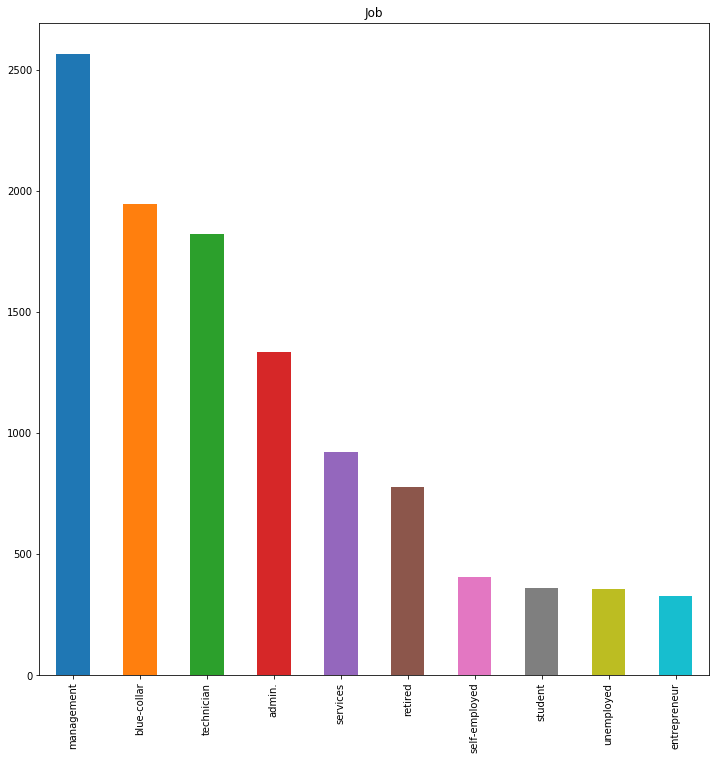

In [9]:
#visualization of job types
jobtype = df['job'].str.split(';', expand=True).stack().value_counts().head(10)

#plotting bar graph
plt.figure(figsize=(12,12))
plt.title('Job')
jobtype.plot(kind="bar")

In [10]:
mpl.style.use('ggplot')
churn = df[df["churn"] == 1]
active = df[df["churn"] == 0]

#function for EDA visualizations
def pie_chart(column):
    
    chart1 = go.Pie(values = churn[column].value_counts().values.tolist(),
                    labels = churn[column].value_counts().keys().tolist(),
                    name = "Churn Customers",
                    marker = dict(line = dict(width = 3,
                                             color = "rgb(243,243,243)")
                                 ),
                    hole = .4
                   )
    
    chart2 = go.Pie(values = active[column].value_counts().values.tolist(),
                    labels = active[column].value_counts().keys().tolist(),
                    name = "Active Customers",
                    marker = dict(line = dict(width = 3,
                                             color = "rgb(243,243,243)")
                                 ),
                    hole = .4
                   )
    
    data = [chart1, chart2]
    fig = go.Figure(data = data)
    #py.iplot(fig)
    
cat_cols = ["marital", "location", "job", "education" ]
num_cols = ["age", "default", "balance", "housing", "loan"]
for i in cat_cols:
    pie_chart(i)
    
for i in num_cols:
    pie_chart(i)
    
    

In [11]:
#assigning values to churn and active customers
mpl.style.use('ggplot')
churn     = df[df["churn"] == 1]
active = df[df["churn"] == 0]
 
def plot_pie(column) :
    
    chart1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    domain  = dict(x = [0,.48]),
                    name    = "Churn",
                    marker  = dict(line = dict(width = 1,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .4
                   )
    chart2 = go.Pie(values  = active[column].value_counts().values.tolist(),
                    labels  = active[column].value_counts().keys().tolist(),
                    marker  = dict(line = dict(width = 1,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.55,1]),
                    hole    = .4,
                    name    = "Active" 
                   )
 
 
    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Churn",
                                                font = dict(size = 14),
                                                showarrow = False,
                                                x = .18, y = .5),
                                           dict(text = "Active",
                                                font = dict(size = 14),
                                                showarrow = False,
                                                x = .80,y = .5
                                               )
                                          ]
                           )
                      )
    data = [chart2,chart1]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)
 
 
#function  for histogram for customer churn types
def histogram(column) :
    chart1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn",
                          marker = dict(line = dict(width = .4,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .8 
                         ) 
    
    chart2 = go.Histogram(x  = active[column],
                          histnorm = "percent",
                          name = "Active",
                          marker = dict(line = dict(width = .4,
                                              color = "black"
                                             )
                                 ),
                          opacity = .8
                         )
    
    data = [chart2,chart1]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df)  :
    
    df  = df.sort_values(by = "churn" ,ascending = False)
    classes = df["churn"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code
 
    color_vals = [class_code[cl] for cl in df["churn"]]
    color_vals
 
    pl_colorscale = "Portland"
 
    pl_colorscale
 
    text = [df.loc[k,"churn"] for k in range(len(df))]
    text
 
    trace = go.Splom(dimensions = [dict(label  = "age",
                                       values = df["balance"]),
                                  dict(label  = 'balance',
                                       values = df['balance']),
                                  dict(label  = 'duration',
                                       values = df['duration'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Numerical columns for customer attrition",
                            autosize = False,
                            height = 700,
                            width  = 700,
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)
 
    
cat_cols = ["marital", "job", "education" ]
num_cols = ["age", "default", "balance", "housing", "loan"]
#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)
 
#for all categorical columns plot histogram    
for i in num_cols :
    histogram(i)

In [12]:
#correlation
corr_data = df[['products', 'duration', 'loan', 'housing', 'balance', 'default', 'age']]
correlation = corr_data.corr()
scatter_cols = correlation.columns.tolist()

corr_array = np.array(correlation)

fig = go.Figure(data=go.Heatmap(
        z = corr_array,
        x = scatter_cols,
        y = scatter_cols,
        colorscale = 'blugrn'))

fig.show()


In [13]:
#training dataset
X = df[['age', 'default', 'balance', 'housing', 'loan']]
y = df["churn"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 8929 samples.
Testing set has 2233 samples.


In [14]:
#calculating model accuracy

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %2f%%" % (accuracy * 100.0))

[13:38:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Accuracy: 79.131214%


C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



In [15]:
#train and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)

#model building
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:38:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGB classifier on training set: 0.80
Accuracy of XGB classifier on test set: 0.79


C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



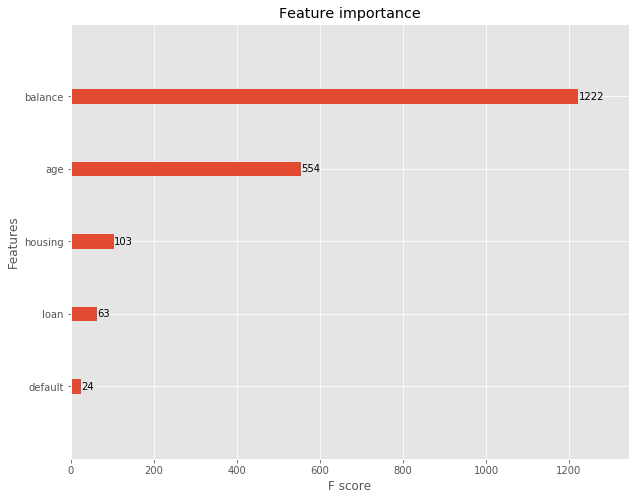

In [16]:
#plotting important features
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

In [17]:
# calculating precision and recall

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

param = {'max_depth':3, 'eta':1, 'objective':'multi:softprob', 'num_class':5 }
num_round = 2
bst = xgb.train(param, dtrain, num_round)

pred = bst.predict(dtest)
improv_pred = np.asarray([np.argmax(line) for line in pred])

print("Precision = {}".format(precision_score(y_test, improv_pred, average = 'macro')))
print("Recall = {}".format(recall_score(y_test, improv_pred, average = 'macro')))


[13:38:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precision = 0.3962432915921288
Recall = 0.5


C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.



In [18]:
#creating the churn probability
df['probability'] = xgb_model.predict_proba(df[X_train.columns])[:,1]

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



In [19]:
#printing out probability column
probability = df[['customer_id', 'probability']]
probability.head(10)

,customer_id,probability
0,1001,0.781680
1,1002,0.756692
2,1003,0.753211
3,1004,0.748117
4,1005,0.780885
5,1006,0.710455
6,1007,0.636237
7,1008,0.862454
8,1009,0.735264
9,1010,0.826722


In [20]:
#export to excel
probability.to_excel("churn.xlsx")

In [21]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]
%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.62193	validation_0-error:0.20428	validation_1-auc:0.59356	validation_1-error:0.21467
[1]	validation_0-auc:0.63093	validation_0-error:0.20447	validation_1-auc:0.59759	validation_1-error:0.21109
[2]	validation_0-auc:0.64356	validation_0-error:0.20532	validation_1-auc:0.59443	validation_1-error:0.20930
[3]	validation_0-auc:0.65086	validation_0-error:0.20522	validation_1-auc:0.59801	validation_1-error:0.20930
[4]	validation_0-auc:0.65739	validation_0-error:0.20589	validation_1-auc:0.59432	validation_1-error:0.20751
[5]	validation_0-auc:0.65958	validation_0-error:0.20579	validation_1-auc:0.59305	validation_1-error:0.20751
[6]	validation_0-auc:0.66559	validation_0-error:0.20589	validation_1-auc:0.59270	validation_1-error:0.20751
[7]	validation_0-auc:0.67125	validation_0-error:0.20560	validation_1-auc:0.59486	validation_1-error:0.20751
[8]	validation_0-auc:0.67515	validation_0-error:0.20541	validation_1-auc:0.60020	validation_1-error:0.20751


C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[9]	validation_0-auc:0.68022	validation_0-error:0.20551	validation_1-auc:0.60373	validation_1-error:0.20751
[10]	validation_0-auc:0.68238	validation_0-error:0.20532	validation_1-auc:0.60778	validation_1-error:0.20751
[11]	validation_0-auc:0.69178	validation_0-error:0.20494	validation_1-auc:0.60495	validation_1-error:0.20751
[12]	validation_0-auc:0.69533	validation_0-error:0.20475	validation_1-auc:0.60852	validation_1-error:0.20751
[13]	validation_0-auc:0.70403	validation_0-error:0.20447	validation_1-auc:0.61291	validation_1-error:0.20751
[14]	validation_0-auc:0.70552	validation_0-error:0.20343	validation_1-auc:0.61471	validation_1-error:0.20751
[15]	validation_0-auc:0.70909	validation_0-error:0.20343	validation_1-auc:0.61090	validation_1-error:0.20751
[16]	validation_0-auc:0.72045	validation_0-error:0.20306	validation_1-auc:0.60611	validation_1-error:0.20751
[17]	validation_0-auc:0.72225	validation_0-error:0.20240	validation_1-auc:0.60556	validation_1-error:0.20930
[18]	validation_0-au

[85]	validation_0-auc:0.83635	validation_0-error:0.18702	validation_1-auc:0.59296	validation_1-error:0.22540
[86]	validation_0-auc:0.83664	validation_0-error:0.18712	validation_1-auc:0.59216	validation_1-error:0.22540
[87]	validation_0-auc:0.83813	validation_0-error:0.18721	validation_1-auc:0.59422	validation_1-error:0.22540
[88]	validation_0-auc:0.83820	validation_0-error:0.18730	validation_1-auc:0.59386	validation_1-error:0.22540
[89]	validation_0-auc:0.83825	validation_0-error:0.18702	validation_1-auc:0.59397	validation_1-error:0.22540
[90]	validation_0-auc:0.83838	validation_0-error:0.18702	validation_1-auc:0.59395	validation_1-error:0.22540
[91]	validation_0-auc:0.83855	validation_0-error:0.18712	validation_1-auc:0.59547	validation_1-error:0.22540
[92]	validation_0-auc:0.83954	validation_0-error:0.18702	validation_1-auc:0.59633	validation_1-error:0.22540
[93]	validation_0-auc:0.84223	validation_0-error:0.18693	validation_1-auc:0.59307	validation_1-error:0.22540
[94]	validation_0-a

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=8, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [22]:
model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)

In [23]:
#Evaluation dataset
eval_set = [(X_train, y_train),(X,y)]

#defining parameters
model = xgb.XGBClassifier(subsample=1,
colsample_bytree=1,
min_child_weight=1,
max_depth=6,
learning_rate=0.3,
n_estimators=100)

#fit model
model.fit(X_train,y_train,early_stopping_rounds=10, eval_metric="error",eval_set=eval_set,verbose=0)

#making predictions
predictions = model.predict(X)
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y, predictions))

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



Accuracy: 0.7951979931911843


In [28]:
#defining parameters
parameters = {"subsample":[0.5, 0.75, 1],
"colsample_bytree":[0.5, 0.75, 1],
"max_depth":[2, 6, 12],
"min_child_weight":[1,5,15],
"learning_rate":[0.3, 0.1, 0.03],
"n_estimators":[100]}

In [29]:
#XBG model
model = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
"""Initialise Grid Search Model to inherit from the XGBoost Model,
set the of cross validations to 3 per combination and use accuracy
to score the models."""
model_gs = GridSearchCV(model,param_grid=parameters,cv=3,scoring="accuracy", use_label_encoder=False, [num_class - 1])

#Fit model
model_gs.fit(X_train,y_train,early_stopping_rounds=10, eval_metric="error",eval_set=eval_set,verbose=0)


C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarnin

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarnin

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarnin

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarnin

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarnin

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarnin

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarnin

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarnin

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarnin

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarnin

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarnin

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarnin

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarnin

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:



GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_w...e,
       tree_method=None, use_label_encoder=True, validate_parameters=None,
       verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'subsample': [0.5, 0.75, 1], 'colsample_bytree': [0.5, 0.75, 1], 'max_depth': [2, 6, 12], 'min_child_weight': [1, 5, 15], 'learning_rate': [0.3, 0.1, 0.03], 'n_estimators': [100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [30]:
predictions = model_gs.predict(X)
print('Accuracy:',accuracy_score(y, predictions))

Accuracy: 0.7957355312667981


C:\Users\kwame.adu\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

